In [1]:
from datetime import datetime
import torch

from models import raw_train_loader, train_loader, test_loader

def evaluate_model(model, data_loader):
	model.eval()

	correct = 0
	total_loss = 0

	criterion = torch.nn.CrossEntropyLoss()

	with torch.no_grad():
		for images, labels in data_loader:
			outputs = model(images)

			loss = criterion(outputs, labels)
			total_loss += loss.item()

			_, predicted = torch.max(outputs.data, 1)
			correct += (predicted == labels).sum().item()

	accuracy = correct / len(data_loader.dataset)

	return total_loss / len(data_loader), accuracy

def train_one_epoch(model, optimizer):
	criterion = torch.nn.CrossEntropyLoss()
	
	model.train()

	for images, labels in train_loader:
		optimizer.zero_grad()

		outputs = model(images)
		loss = criterion(outputs, labels)
		loss.backward()
		optimizer.step()

	train_loss, train_accuracy = evaluate_model(model, raw_train_loader)
	test_loss, test_accuracy = evaluate_model(model, test_loader)
	
	return train_loss, train_accuracy, test_loss, test_accuracy

def train_model(model, optimizer, num_epochs):
	scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, mode='min', patience=3)

	train_losses = []
	train_accuracies = []
	test_losses = []
	test_accuracies = []

	start_time = datetime.now()

	for epoch in range(num_epochs):
		train_loss, train_accuracy, test_loss, test_accuracy = train_one_epoch(model, optimizer)

		train_losses.append(train_loss)
		train_accuracies.append(train_accuracy)
		test_losses.append(test_loss)
		test_accuracies.append(test_accuracy)

		print(f'Epoch {epoch+1}: '
			  f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, '
			  f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')
		
		scheduler.step(test_loss)
		
	end_time = datetime.now()

	print(f'Training completed in: {end_time - start_time}')
	print(f'Average Time per Epoch: {(end_time - start_time) / num_epochs}')
		
	# plots for the train vs test loss
	import matplotlib.pyplot as plt

	plt.figure(figsize=(12, 5))
	plt.subplot(1, 2, 1)
	plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
	plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
	plt.xlabel('Epochs')
	plt.ylabel('Loss')
	plt.title('Train vs Test Loss')
	plt.legend()

	plt.subplot(1, 2, 2)
	plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
	plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
	plt.xlabel('Epochs')
	plt.ylabel('Accuracy')
	plt.title('Train vs Test Accuracy')
	plt.legend()
	plt.show()
	

Epoch 1: Train Loss: 1.8397, Train Accuracy: 0.3716, Test Loss: 1.8323, Test Accuracy: 0.4000
Epoch 2: Train Loss: 1.7002, Train Accuracy: 0.4124, Test Loss: 1.6846, Test Accuracy: 0.3800
Epoch 3: Train Loss: 1.5800, Train Accuracy: 0.4344, Test Loss: 1.6406, Test Accuracy: 0.3800
Epoch 4: Train Loss: 1.5366, Train Accuracy: 0.4796, Test Loss: 1.5681, Test Accuracy: 0.4000
Epoch 5: Train Loss: 1.4875, Train Accuracy: 0.4972, Test Loss: 1.4369, Test Accuracy: 0.4400
Epoch 6: Train Loss: 1.4551, Train Accuracy: 0.4909, Test Loss: 1.5212, Test Accuracy: 0.4800
Epoch 7: Train Loss: 1.4132, Train Accuracy: 0.5129, Test Loss: 1.4009, Test Accuracy: 0.4800
Epoch 8: Train Loss: 1.4061, Train Accuracy: 0.5148, Test Loss: 1.4578, Test Accuracy: 0.4400
Epoch 9: Train Loss: 1.3441, Train Accuracy: 0.5493, Test Loss: 1.3933, Test Accuracy: 0.4600
Epoch 10: Train Loss: 1.3197, Train Accuracy: 0.5537, Test Loss: 1.4394, Test Accuracy: 0.4800
Epoch 11: Train Loss: 1.3046, Train Accuracy: 0.5493, Test 

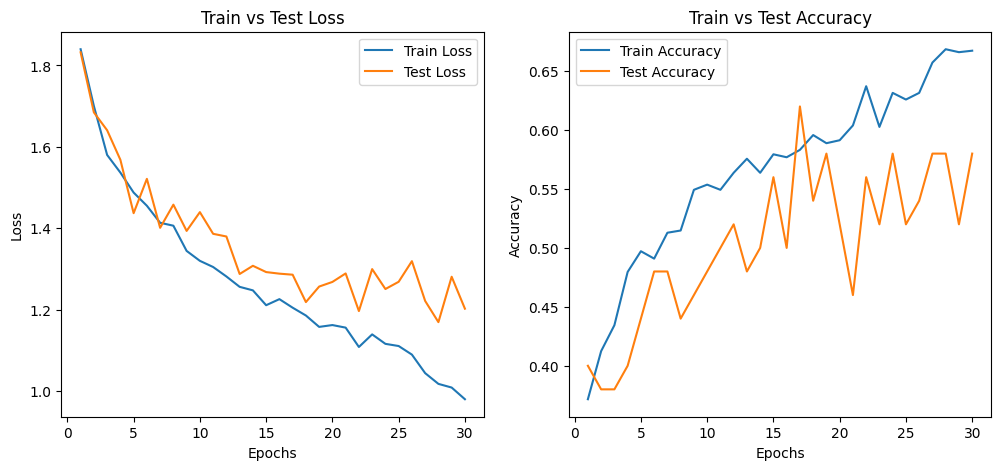

In [3]:
import torch
from models import MultiLayerPerceptron

# MLP training
mlp_model = MultiLayerPerceptron()

mlp_optimizer = torch.optim.AdamW(mlp_model.parameters(), lr=1e-3, weight_decay=1e-5)

train_model(mlp_model, mlp_optimizer, num_epochs=30)
mlp_model.save("checkpoints/mlp-original.pt")

Epoch 1: Train Loss: 1.6305, Train Accuracy: 0.4193, Test Loss: 1.6597, Test Accuracy: 0.3800
Epoch 2: Train Loss: 1.4225, Train Accuracy: 0.4903, Test Loss: 1.2138, Test Accuracy: 0.5600
Epoch 3: Train Loss: 1.4595, Train Accuracy: 0.4796, Test Loss: 1.3085, Test Accuracy: 0.5000
Epoch 4: Train Loss: 1.3310, Train Accuracy: 0.5417, Test Loss: 1.1987, Test Accuracy: 0.5800
Epoch 5: Train Loss: 1.0389, Train Accuracy: 0.6315, Test Loss: 0.9496, Test Accuracy: 0.6200
Epoch 6: Train Loss: 1.1939, Train Accuracy: 0.5982, Test Loss: 1.2498, Test Accuracy: 0.5600
Epoch 7: Train Loss: 0.9317, Train Accuracy: 0.6648, Test Loss: 0.9706, Test Accuracy: 0.6000
Epoch 8: Train Loss: 1.0903, Train Accuracy: 0.6196, Test Loss: 1.0406, Test Accuracy: 0.7400
Epoch 9: Train Loss: 1.0079, Train Accuracy: 0.6397, Test Loss: 1.0977, Test Accuracy: 0.7400
Epoch 10: Train Loss: 0.8012, Train Accuracy: 0.7207, Test Loss: 0.8262, Test Accuracy: 0.7400
Epoch 11: Train Loss: 0.7176, Train Accuracy: 0.7564, Test 

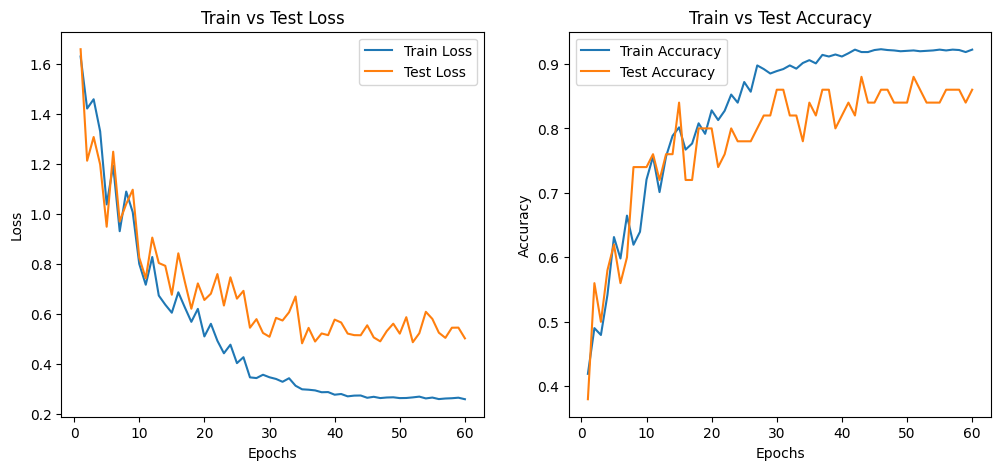

In [ ]:
import torch
from models import CNNModel

# CNN training
cnn_model = CNNModel()

cnn_optimizer = torch.optim.AdamW(cnn_model.parameters(), lr=1e-3, weight_decay=1e-4)

train_model(cnn_model, cnn_optimizer, num_epochs=60)
cnn_model.save("checkpoints/cnn-original.pt")